# CAS KAGGLE POKEMON

### Importar BD

El primer que fem és importar les llibreries necessàries i la nostra base de dades, que en aquest cas tracta sobre Pokémon.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, roc_auc_score, plot_confusion_matrix, confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import time

dataset = pd.read_csv(r"C:\Users\marcm\Downloads\pokemon.csv")


### Analitzar BD

Ara mostrarem algunes de les dades per poder entendre millor que estem buscant, i altres dades informatives per veure si tenim algun problema previ, com per exemple nulls o variables contínues.

In [2]:
pd.set_option('display.max_columns', None)
dataset.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [3]:
dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


Aquí hem pogut comprendre la nostra BD, que tracta sobre Pokémon. La BD conté informació sobre 802 Pokémon, de primera a sèptima generació. Les nostres variables són les estadístiques i informació individual sobre cada Pokémon, com pot ser el seu pes, nom, tipus, quins tipus d'atacs són eficaços contra ells, les seves estadístiques com atac, defensa, etc.

Després de veure una mica les dades observem que la nostra variable objectiu serà is_legendary, és a dir volem predir si un Pokémon és o no legendary.


### Preprocessing

Hem pogut veure que tenim valors nulls, principalment a la variable type2 i percentage_male, això és pel fet que alguns Pokémons només tenen 1 tipus, i, per tant, el segon és null, i que molts legendaris no tenen un gènere definit.

També hem pogut veure que a la fila 773 tenim un valor estrany a la variable capture_rate, que en comptes de ser un valor int té una sèrie de valors str, en conseqüència eliminem aquesta fila.

In [4]:
#eliminem la fila que dona problemes
dataset = dataset.drop(773)

#comprovem els nulls
dataset.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       97
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


Aquí podem veure el comentat anteriorment, la variable type2 i percentage_male tenen molts nulls, però són necessaris.

En canvi, veiem que també tenim nulls a les variables weight_kg i height_m. Aquests sí que els considerem error, per tant, eliminarem les files respectives. Però primer transformarem els nulls de la variable type2 i percentage_male en 0.

In [5]:
dataset = dataset.fillna({'type2': 0})
dataset['type2'] = dataset['type2'].astype(str)

dataset = dataset.fillna({'percentage_male': 0})
dataset['percentage_male'] = dataset['percentage_male'].astype(float)

Amb aquesta funció hem transformat els nulls de la variable type2 i percentage_male en 0, per tant, ara podrem eliminar les files que tinguin un null en altres variables.

In [6]:
print('nulls variable type2')
print(dataset['type2'].isnull().sum())
print('nulls variable percentage_male')
print(dataset['percentage_male'].isnull().sum())

nulls variable type2
0
nulls variable percentage_male
0


Observem que la variable type2 i percentage_male ara tenen 0 valors a null, per tant, podem eliminar la resta de files amb nulls.

In [7]:
dataset = dataset.dropna()
dataset.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

Observem que ja no hi ha nulls, per tant, podem continuar treballant amb la BD.

Ara, com hem vist que hi ha variables que són strings, les transformarem en tipus int per poder treballar amb més facilitat, aquelles que són paraules transformarem cada paraula en un valor int, de forma que totes les paraules iguals tinguin el mateix valor int.

In [8]:
dataset['capture_rate'] = dataset['capture_rate'].astype(int)

variablesStr = ['abilities','classfication','type1','type2','name','japanese_name']

for variable in variablesStr:
    le = preprocessing.LabelEncoder()
    le.fit(dataset[variable])
    dataset[variable] = le.transform(dataset[variable])


Continuem observant les correlacions

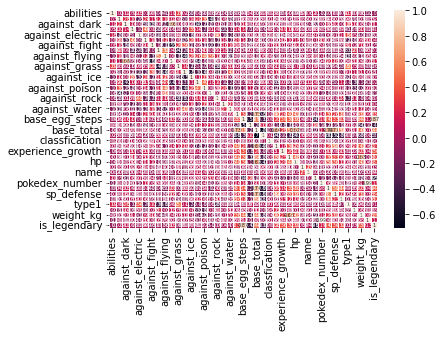

In [9]:
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5 ,annot_kws={'fontsize':5})

Com d'aquesta manera no es veuen bé les correlacions les representaré d'una altra manera.

<Figure size 3600x72 with 0 Axes>

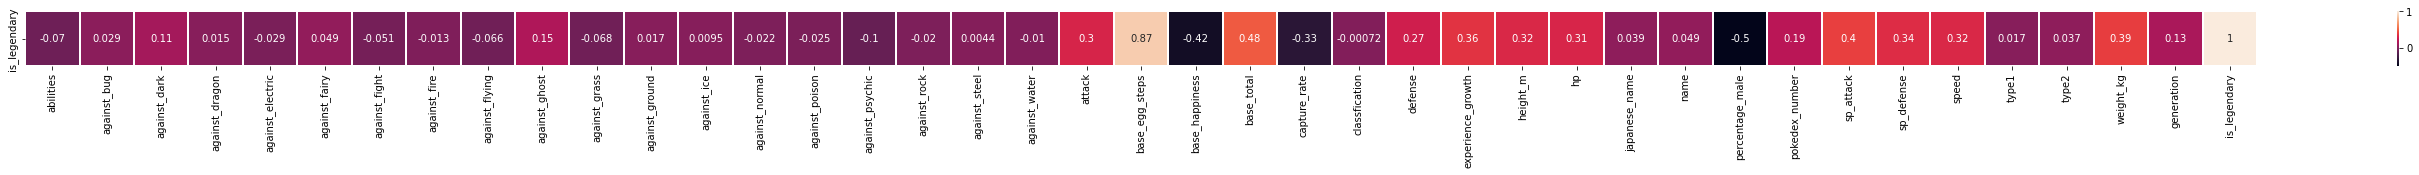

In [10]:
correlacions = dataset.corr()['is_legendary'].to_frame().T 
plt.figure(figsize=(50,1))
plt.subplots(figsize=(50, 1))
sns.heatmap(correlacions, linewidths=0.3, annot=True)
plt.show()

D'aquestes correlacions podem deduir i descartar moltes coses. 

La principal idea que veiem és que la variable que té una correlació més important amb el nostre objectiu és base_egg_steps, amb una correlació del 87%.

També veiem que hi ha moltes variables que no té sentit relacionar-les amb la nostra variable objectiu is_legendary, com és el cas de les variables name, japanese_name, generation i pokedex_number entre d'altres.

A més podem descartar variables com per exemple tots els against_X, ja que es pot veure que tenen una  correlacio molt petita, fins i tot <0, i és normal perquè aquestes variables són en funció del tipus del Pokémon, i un Pokémon llegendari pot ser de qualsevol tipus. 

Podem comprovar també que les variables amb millor correlació estan relacionades amb les estadístiques individuals del Pokémon, ja que els pokémons llegendaris acostumen a ser més poderosos.

Per últim, podem veure que hi ha 3 variables amb una correlació molt negativa, aquestes correlacions també són importants pel fet que vol dir que la variable està molt relacionada amb la variable objectiu, però de forma inversa.

Per tant, procedim a eliminar les variables innecessàries.

In [11]:
dataset = dataset.drop(['abilities','against_bug','against_dark','against_dragon','against_electric','against_fairy','against_fight','against_fire','against_flying','against_ghost','against_grass','against_ground','against_ice','against_normal','against_poison','against_psychic','against_rock','against_steel','against_water','classfication','pokedex_number','name','japanese_name','type1','type2','generation'],axis = 1)
dataset.head(10)

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,65,65,45,6.9,0
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,80,80,60,13.0,0
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,122,120,80,100.0,0
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,60,50,65,8.5,0
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,80,65,80,19.0,0
5,104,5120,70,634,45,78,1059860,1.7,78,88.1,159,115,100,90.5,0
6,48,5120,70,314,45,65,1059860,0.5,44,88.1,50,64,43,9.0,0
7,63,5120,70,405,45,80,1059860,1.0,59,88.1,65,80,58,22.5,0
8,103,5120,70,630,45,120,1059860,1.6,79,88.1,135,115,78,85.5,0
9,30,3840,70,195,255,35,1000000,0.3,45,50.0,20,20,45,2.9,0


<Figure size 2160x108 with 0 Axes>

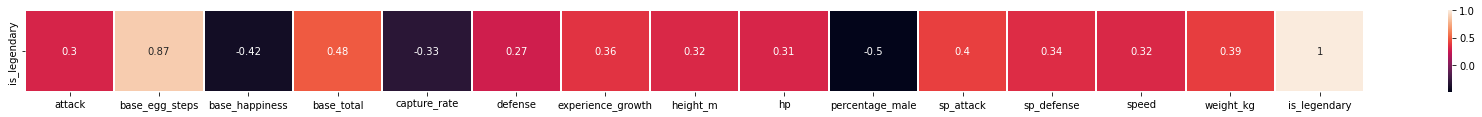

In [12]:
correlacions = dataset.corr()['is_legendary'].to_frame().T 
plt.figure(figsize=(30,1.5))
plt.subplots(figsize=(30, 1.5))
sns.heatmap(correlacions, linewidths=0.3, annot=True)
plt.show()

Ara podem observar que ens hem quedat amb aquelles variables que més afecten la nostra variable objectiu.

El següent pas a fer és normalitzar les variables, ja que hi ha algunes que poden tenir uns valors molt dispersos.

In [13]:
variableObjectiu = dataset['is_legendary']
dataset = dataset.drop(['is_legendary'],axis = 1)

datasetNormalitzat = preprocessing.normalize(dataset)

# Models

El primer que hem de fer abans de començar a fer models és dividir la nostra BD en train i test, utilitzarem un 80% de les dades pel train i el 20% restant pel test.

In [14]:
trainX, testX, trainY, testY = train_test_split(datasetNormalitzat, variableObjectiu, train_size=0.8)

### Histograma

Com la BD a la variable objectiu té pocs valors 1 comprovem que s'hagin repartit més o menys equivalentment, ja que si tots els 1 estan al test o train causarà un problema en fer l'entrenament.

<Figure size 720x504 with 0 Axes>

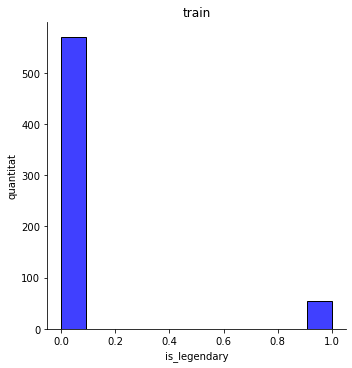

<Figure size 720x504 with 0 Axes>

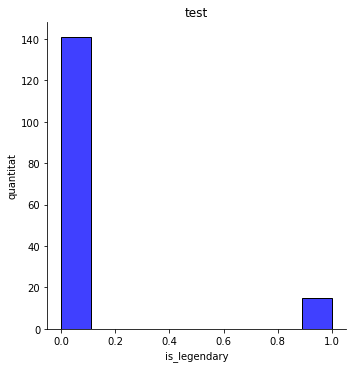

In [15]:
plt.figure(figsize=(10,7))
sns.displot(trainY, color='b', kde=False)
plt.ylabel('quantitat')
plt.title('train')
plt.show()


plt.figure(figsize=(10,7))
sns.displot(testY, color='b', kde=False)
plt.ylabel('quantitat')
plt.title('test')
plt.show()

Observem que s'han repartit de forma correcta.

### Random Forest

El primer model que provem és el Random Forest.

In [16]:
tempsInici = time.time()

#entrenem les nostres dades
entrenamentRandomForest = RandomForestClassifier(n_estimators=1000, random_state = 1807)
entrenamentRandomForest.fit(trainX, trainY)
prediccioY = entrenamentRandomForest.predict(testX)
accuracyRandomForest = round(accuracy_score(testY, prediccioY)*100,2)
print('accuracy:')
print(round(accuracyRandomForest,2), '%')

tempsFin = time.time()
print('temps:')
print(tempsFin - tempsInici)

accuracy:
100.0 %
temps:
3.2352705001831055


Com el resultat és molt bo, mirem la corba roc i la confusion matrix per veure si és correcte o si hi ha hagut algun problema.

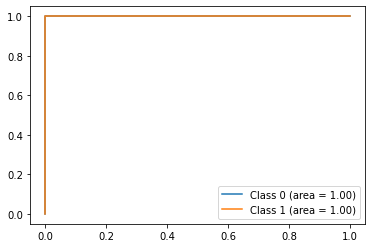

In [17]:
fpr = {}
tpr = {}
roc_auc = {}
probabilitat = entrenamentRandomForest.predict_proba(testX)
#in range(2) porque mi variable objetivo es 1 o 0
for i in range(2):
    fpr[i], tpr[i],_  = roc_curve(testY == i, probabilitat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

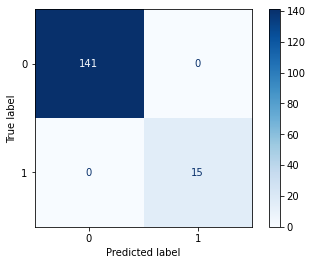

In [18]:
confusion_matrix(testY,prediccioY)
plot_confusion_matrix(entrenamentRandomForest, testX, testY, cmap=plt.cm.Blues)
plt.show()

Podem veure que el random forest ens dona uns molt bons resultats

### SVM

A continuació del Random Forest provem el SVM per veure si és igual d'efectiu en el nostre cas.

In [19]:
tempsInici = time.time()

#primer entrenem les dades
entrenamentSVM = svm.SVC(probability=True)
entrenamentSVM.fit(trainX,trainY)

#fem la prediccio
prediccioSVM = entrenamentSVM.predict(testX)

#calculem la acuracy
accuracySVM = round(accuracy_score(testY, prediccioSVM)*100, 2)

print('accuracy SVM:')
print(round(accuracySVM,2), '%')

print('temps:')
tempsFin = time.time()
print(tempsFin - tempsInici)

accuracy SVM:
90.38 %
temps:
0.052948951721191406


Com el resultat també és bo, mirem la corba roc per veure si és correcte o si hi ha hagut algun problema.

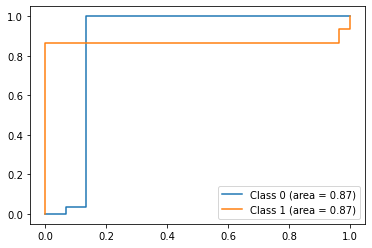

In [20]:
fpr = {}
tpr = {}
roc_auc = {}
probabilitat = entrenamentSVM.predict_proba(testX)
#in range(2) porque mi variable objetivo es 1 o 0
for i in range(2):
    fpr[i], tpr[i],_  = roc_curve(testY == i, probabilitat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

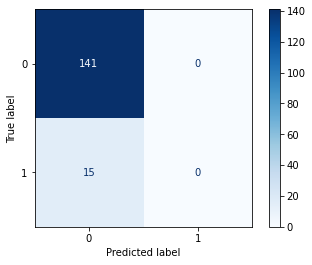

In [21]:
confusion_matrix(testY,prediccioSVM)
plot_confusion_matrix(entrenamentSVM, testX, testY, cmap=plt.cm.Blues)
plt.show()

Podem veure que el SVM també dona molt bona accuracy, però que el resultat és dolent, ja que no hi ha cap true-negative, sinó que està tot a false-positive. Vol dir que aquest mètode ha interpretat que tots els casos eren positius.

### KNN 

Per últim provem el KNN

In [22]:
tempsInici = time.time()

#primer entrenem
entrenamentKNN = KNeighborsClassifier()
entrenamentKNN.fit(trainX,trainY)

#fem la prediccio
prediccioKNN = entrenamentKNN.predict(testX)

#calculem la accuracy
accuracyKNN = round(accuracy_score(testY, prediccioKNN)*100, 2)

print('accuracy KNN:')
print(round(accuracyKNN,2), '%')

print('temps:')
tempsFin = time.time()
print(tempsFin - tempsInici)

accuracy KNN:
99.36 %
temps:
0.01855325698852539


Com el resultat és molt bo, mirem la corba roc per veure si és correcte o si hi ha hagut algun problema.

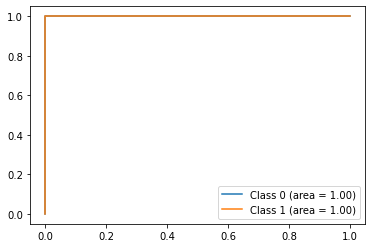

In [23]:
tempsInici = time.time()

fpr = {}
tpr = {}
roc_auc = {}
probabilitat = entrenamentKNN.predict_proba(testX)

#in range(2) porque mi variable objetivo es 1 o 0
for i in range(2):
    fpr[i], tpr[i],_  = roc_curve(testY == i, probabilitat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

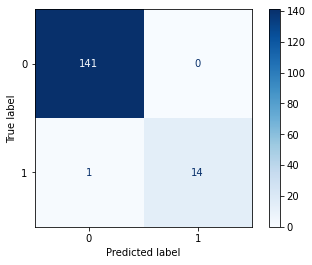

In [24]:
confusion_matrix(testY,prediccioKNN)
plot_confusion_matrix(entrenamentKNN, testX, testY, cmap=plt.cm.Blues)
plt.show()

Observem que aquest últim model dona resultats molt acceptables, i encara que son una mica pitjors que amb el Random Forest, també veiem que en rendiment es molt millor.

### Xarxa Neuronal

Generem la xarxa neuronal, fent 500 cicles

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(14,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)


# Iniciamos el entrenamiento
entrenamentRedNeuronal = model.fit(trainX,trainY,epochs=500)

Epoch 1/500
20/20 [==============================] - 2s 3ms/step - loss: 2.0689 - accuracy: 0.4407 
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 1.6324 - accuracy: 0.9135
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 1.2032 - accuracy: 0.9135
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.9135
Epoch 5/500
20/20 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.9135
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.9135
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.9135
Epoch 8/500
20/20 [==============================] - 0s 5ms/step - loss: 0.3651 - accuracy: 0.9135
Epoch 9/500
20/20 [==============================] - 0s 6ms/step - loss: 0.3469 - accuracy: 0.9135
Epoch 10/500
20/20 [==============================] - 0s 6ms/step - loss: 0.3351 - accuracy: 0.9135
Epoch 11

Aquí podem observar com va augmentant l'accuracy amb cada cicle. Cal destacar que l'accuracy és constant fins al voltant del cicle 200.

In [26]:
model.evaluate(testX,testY)

5/5 [==============================] - 1s 5ms/step - loss: 0.0991 - accuracy: 0.9872


[0.09913910180330276, 0.9871794581413269]

Aqui observem el resultat final de la nostra xarxa neuronal.

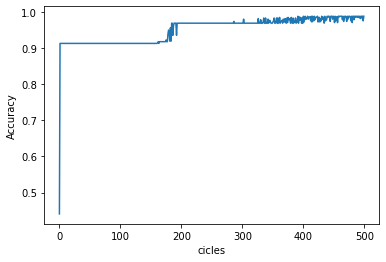

In [27]:
plt.xlabel("cicles")
plt.ylabel("Accuracy")
plt.plot(entrenamentRedNeuronal.history["accuracy"])


Aquí la xarxa neuronal mostrada amb una gràfica per veure millor com va evolucionant l'accuracy amb els cicles.

# Conclusions

Podem veure que aquesta és una BD molt senzilla, ja que només té 800 files, que pertanyen cadascuna a un del Pokémon existents, això ha causat alguns petits problemes que no es poden evitar, perquè l'única manera d'ampliar aquesta BD seria afegint informació de Pokémon de futures generacions.

A l'inici del tractament he tingut dificultats a causa dels valors null que hi havia originalment a la BD, ja que afectaven molt a les porques files on la variable objectiu valia 1. Però una vegada arreglats tot ha funcionat correctament.

Després de fer els models hem vist que l'únic que dona problemes és el SVM, pel fet que encara que la seva accuracy és bona el resultat no ho és, perquè a la confusion matrix es pot veure que no hi ha cap true-negative, sinó que tot són false-positives o true-positives. Això vol dir que està classificant tot com a true, i l'accuracy alta és deguda al fet que hi ha poc nombre de resultats negatius respecte als positius.

La resta de models han funcionat correctament, donant bona accuracy, corbes roc i confusion matrix. El millor seria o el Random Forest respecte a percentatge d'encerts, però si el temps també és un factor a tindre en compte llavors el KNN seria el millor, ja que és molt més eficient, però perd una mica d'accuracy.